In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch7/data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


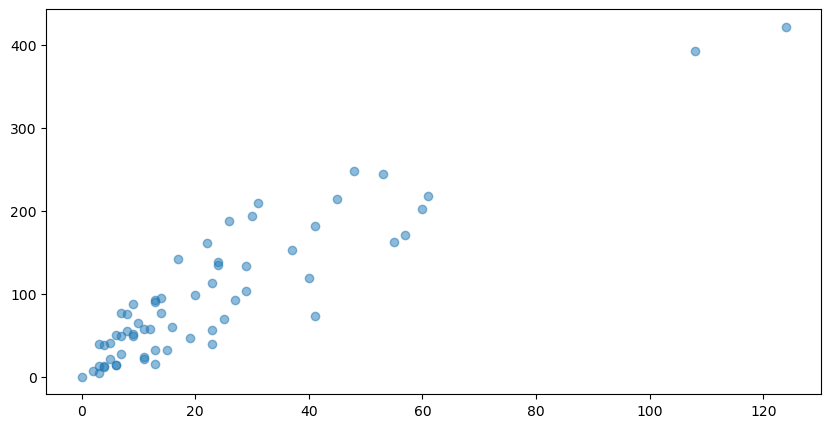

In [3]:
raw_X = df["X"].values.reshape(-1, 1) # 핸들링하기 쉽도록 각 value를 행렬로 만들어줌
y = df["Y"].values
plt.figure(figsize=(10,5))
plt.plot(raw_X, y, 'o', alpha=0.5)

In [4]:
raw_X[:5], y[:5] # 2차원, 1차원

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [5]:
np.ones((len(raw_X), 1))[:3] # (len, 1)의 차원만큼 1을 채운 2차원 형성

array([[1.],
       [1.],
       [1.]])

In [6]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1) # conca을 사용해 기존 x 값과 합침
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [7]:
w = np.random.normal((2,1)) # 정규분포에서 2개의 값을 뽑아옴 -> 직접 지정해줘도 된다
w

array([2.45946349, 1.69578554])

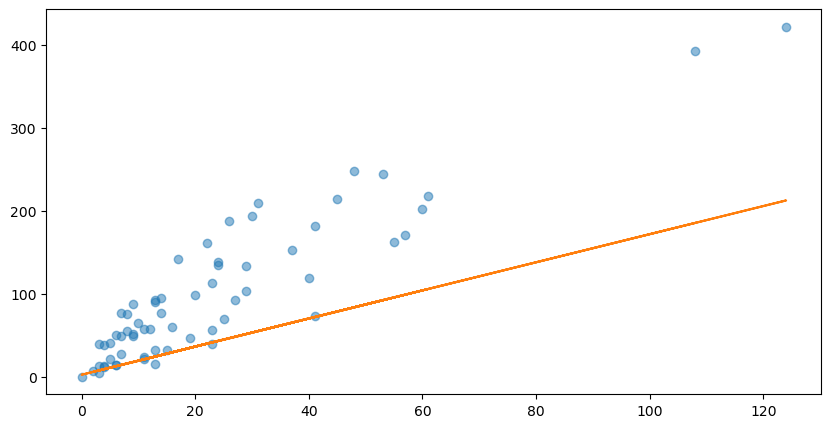

In [8]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
# y^ = Xw로 가설함수를 만들어놓은 후,
plt.plot(raw_X, y, "o", alpha=0.5) # 실제 정답
plt.plot(raw_X, y_predict) # 예측값

### Hypothesis and cost function

In [9]:
def hypothesis_function(X, theta): # 가설 함수
    return X.dot(theta)

def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)
    
h = hypothesis_function(X,w) # 실제 예측값을 가지고 담는 h
cost_function(h, y) # cost function 코드화

3035.408992850098

### Gradient Descent

In [10]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()] # 가중치값 저장
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations): # cost function이 0에 가깝게 갈 때까지 업데이트가 이루어진다
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1]) # 가중치 업데이트
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

### DO Linear regression with GD

In [11]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
# 최종적 theta값, theta_list, cost_list값

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.88301358  3.41623051]
cost: 625.3741064148156


In [12]:
theta_list[:10]

[[2.459463491914821, 1.6957855408287368],
 [2.5163497659559875, 3.9207502572702726],
 [2.601707673885456, 3.7893748853590856],
 [2.689416643860845, 3.7874810406981165],
 [2.7766833116705656, 3.7855967463899147],
 [2.863509907772979, 3.7837219542734903],
 [2.949898651378608, 3.781856616430825],
 [3.035851750506859, 3.780000685185544],
 [3.121371402042449, 3.7781541131016954],
 [3.2064597917915614, 3.776316852982541]]

In [13]:
theta_list = np.array(theta_list)

In [14]:
cost_list[:5]

[3035.408992850098,
 711.5361060131914,
 701.8553842544313,
 701.0859321273356,
 700.3242208784379]

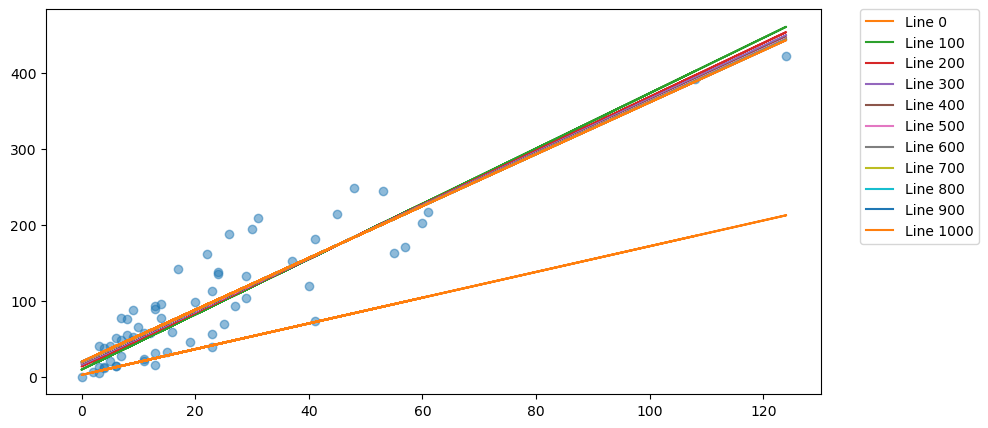

In [15]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose()) # 가중치와 X를 곱해 y 예측값을 구함

plt.plot(raw_X, y, "o", alpha=0.5)
for i in range (0, len(cost_list), 100): # 100번마다 그래프를 그려줌
    plt.plot(raw_X, y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

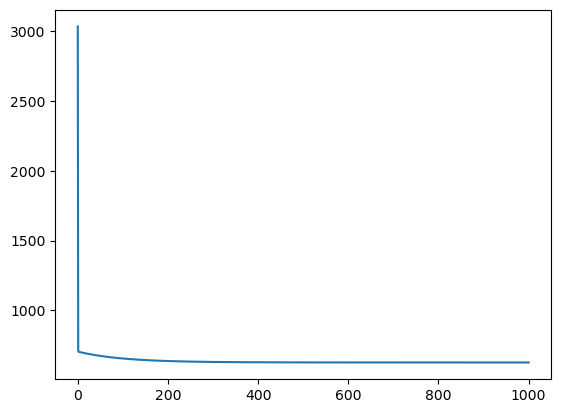

In [16]:
plt.plot(range(len(cost_list)), cost_list); # cost function 그래프

In [17]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1) # 격자 그리드

In [18]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
# np.ravel() : 1차원으로 바꾸는 것 = flatten
Js = Js.reshape(TH0.shape) # cost 값

<a list of 6 text.Text objects>

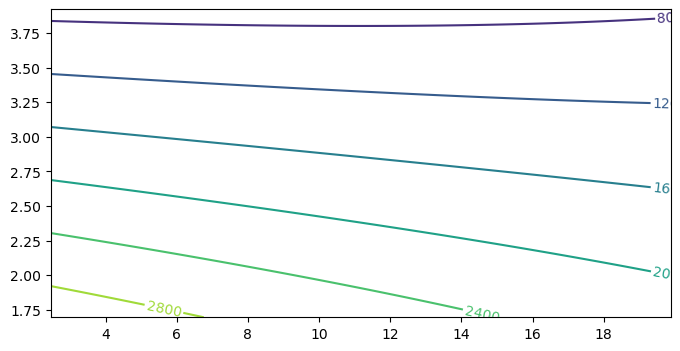

In [19]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)
# theta 0을 x로, theta 1을 y로 해서 그래프를 그려주는데, 서로의 관계에 따라 cost FUNCTION 값이 어떻게 변화하는지 볼 수 있음

In [20]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

/var/folders/yr/33_dxfw93nzc66j2xmmvkxnw0000gn/T/ipykernel_29584/3809405206.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


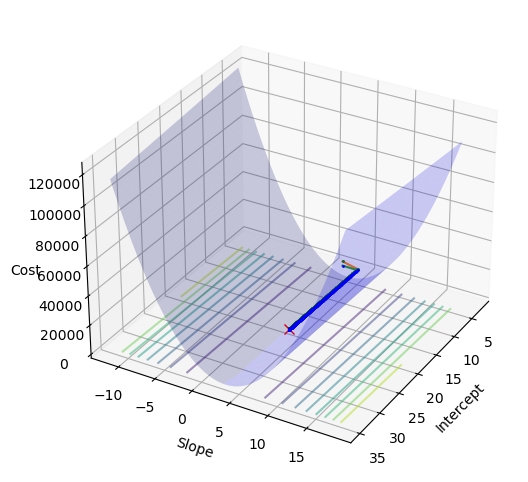

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept') # theta 0의 값
ax.set_ylabel('Slope') # theta 1의 값
ax.set_zlabel('Cost') # cost 값
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);
# 실제 cost function이 어떤식으로 이동했는지를 그리는 것